In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/main/data/default.csv')
df.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


In [2]:
df = df[['default', 'balance']]
df.head()

,default,balance
0,0,729.526495
1,0,817.180407
2,0,1073.549164
3,0,529.250605
4,0,785.655883


In [ ]:
## {1: default, 0: non-default}
# df.default.map({'nondefault': 0, 'default': 1})

In [4]:
## imbalanced vs balanced
## balanced is ideal for PREDICTIVE MODELS
## 1s > 5%
df.default.value_counts() / len(df)

0    0.9667
1    0.0333
Name: default, dtype: float64

<Axes: xlabel='balance', ylabel='default'>

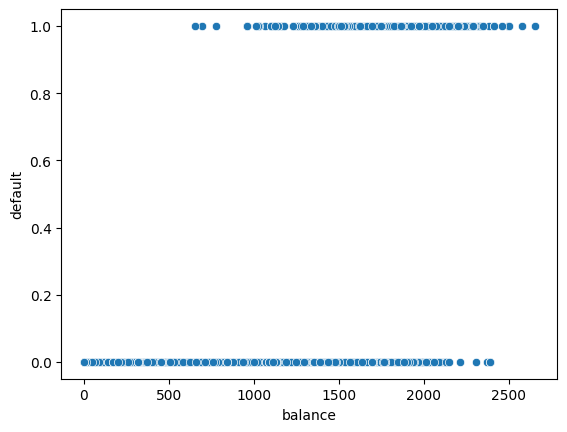

In [5]:
## scatter plot
sns.scatterplot(x = "balance", y = "default", data = df)

## **Logistic Regression**

It is a statistical model. Estimates the probability of an event (class of interest). It is similar to linear regression with the only difference that we use the LOG-ODDS as a response. It is an iterative model.

## **Logistic Regression as a Descriptive Model**

The idea on a descriptive is to learn or describe the relationships.

* Goodness of fit metrics matter: p-values, R2 (linear reg), RMSE, F-statistics.
* You do not split the data into training and test.

In [6]:
## Create the X matrix and y vector
X = df['balance']
y = df['default']

In [14]:
## import
import statsmodels.api as sm

## instance and it
lr = sm.Logit(y, sm.add_constant(X)).fit()

## IF DOES NOT CONVERGE
## 1) change iterations
## 2) change the method from newton
## lr = sm.Logit(y, sm.add_constant(X)).fit(maxiter = 100, method = 'bfgs')

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


In [15]:
## summary show p-values
print(lr.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Mon, 13 Nov 2023   Pseudo R-squ.:                  0.4534
Time:                        22:02:37   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006

Possibly complete quasi-separation: A fraction 0.13

## **Predictions as Probabilities**

The predictions are the LOG-ODDS of default, so they are NOT probabilities. We need to use the LOGIT transform.

In [18]:
## predict the probability of default for past-due balance of $1500
## -2.4 are the LOG-ODDS of default
yhat = -10.6513 + 0.0055*1500
yhat

-2.401300000000001

In [20]:
## LOGIT transform
## the probability of default of someone with past-due balance of $1500 is 8.3%
import numpy as np
prob = np.exp(yhat) / (1 + np.exp(yhat))
prob

0.08307361869693859

In [23]:
## predict the probability of default for past-due balance of $2000
## 1) yhat - LOGODDS OF DEFAULT
yhat = -10.6513 + 0.0055*2000

## 2) LOGIT transform
1 / (1 + np.exp(-yhat))

0.5863022968465423

<Axes: xlabel='balance', ylabel='default'>

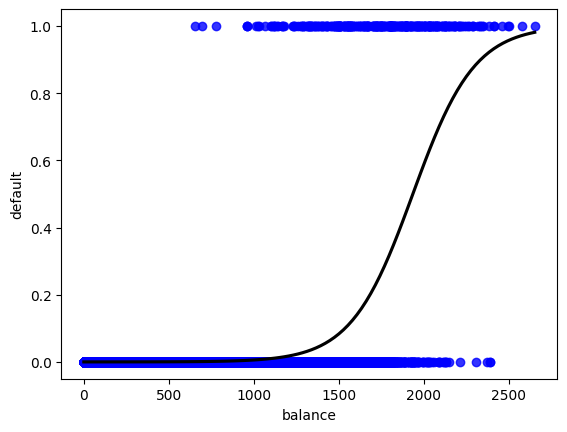

In [22]:
## THE S CURVE
sns.regplot(x = 'balance', y = 'default', data = df, logistic = True, color = "black", ci = None, scatter_kws = {'color': 'blue'})

## **ODDS**

Calculated as:

$\frac{prob}{1 - prob}$

In [24]:
## predict the probability of default for past-due balance of $1600
## 1) yhat - LOGODDS OF DEFAULT
yhat = -10.6513 + 0.0055*1600

## 2) LOGIT transform
1 / (1 + np.exp(-yhat))

0.13572033435970646

In [25]:
## odds of default
0.13572033435970646 / (1 - 0.13572033435970646)

0.1570328908052688

## **INTERPRETATION OF EFFECTS**

The effect means how a predictor is related to the response (prob of default).

#### **EFFECT DIRECTION**

Looking at the sign of the variable can tell you the direction of the effect. For example, balance past-due has a positive (+) effect on the probability of default. The higher the past-due balance, the MORE likely it is for the person to default on the loan.

In [26]:
print(lr.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Mon, 13 Nov 2023   Pseudo R-squ.:                  0.4534
Time:                        22:27:34   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006

Possibly complete quasi-separation: A fraction 0.13

#### **EFFECT INTERPRETATION**

As balance past-due increase, what exactly happens to default odds.

* (OPTION 1) -  As balance increases by \$1, then the ESTIMATED LOG ODDS of default increase by 0.0055
* (OPTION 2) - As balance increases by \$1, then the ESTIMATED ODDS of default CHANGES by a factor of 1.0055

## **EXAMPLE 2 - MULTIVARIATE LOG REG**

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/main/data/heart_disease.csv')

In [32]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [33]:
df.dropna(inplace = True)

In [59]:
## X and y
X = df.drop('TenYearCHD', axis = 1).drop(['diabetes', 'currentSmoker', 'BPMeds', 'BMI', 'heartRate', 'diaBP', 'education', 'prevalentStroke'], axis = 1)
y = df.TenYearCHD

In [60]:
## instance and fit
logreg = sm.Logit(y, sm.add_constant(X)).fit()

Optimization terminated successfully.
         Current function value: 0.377390
         Iterations 7


In [61]:
print(logreg.summary())

                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3656
Model:                          Logit   Df Residuals:                     3648
Method:                           MLE   Df Model:                            7
Date:                Mon, 13 Nov 2023   Pseudo R-squ.:                  0.1157
Time:                        22:47:18   Log-Likelihood:                -1379.7
converged:                       True   LL-Null:                       -1560.3
Covariance Type:            nonrobust   LLR p-value:                 5.315e-74
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -8.7491      0.522    -16.749      0.000      -9.773      -7.725
male             0.5542      0.107      5.181      0.000       0.345       0.764
age              0.0655      0.006     10.18

## male = {1: male, 0: female}

* males have log-odds of getting CHD of 0.5542 compared to the females.
* males have increased odds of getting CHD (BY 1.74) compared to females. 74% higher odds than females

In [62]:
np.exp(0.5542)

1.7405479892587554